In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

apps_path = r"D:\Shreya DA Projects\Analyzing Google Play Store Data [L2] P8\datasets\apps.csv"
reviews_path = r"D:\Shreya DA Projects\Analyzing Google Play Store Data [L2] P8\datasets\user_reviews.csv"
apps_df = pd.read_csv(apps_path)
reviews_df = pd.read_csv(reviews_path)

print("✅ Apps dataset loaded")
print("✅ Reviews dataset loaded")


✅ Apps dataset loaded
✅ Reviews dataset loaded


In [6]:
print("\nApps Dataset Info:")
apps_df.info()


Apps Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [7]:
# data clining 
apps_df = apps_df.dropna(subset=['Rating'])

apps_df['Reviews'] = pd.to_numeric(apps_df['Reviews'], errors='coerce')

apps_df['Installs'] = apps_df['Installs'].str.replace('[+,]', '', regex=True)
apps_df['Installs'] = pd.to_numeric(apps_df['Installs'], errors='coerce')

apps_df['Price'] = apps_df['Price'].str.replace('$', '', regex=False)
apps_df['Price'] = pd.to_numeric(apps_df['Price'], errors='coerce')

apps_df.fillna(0, inplace=True)

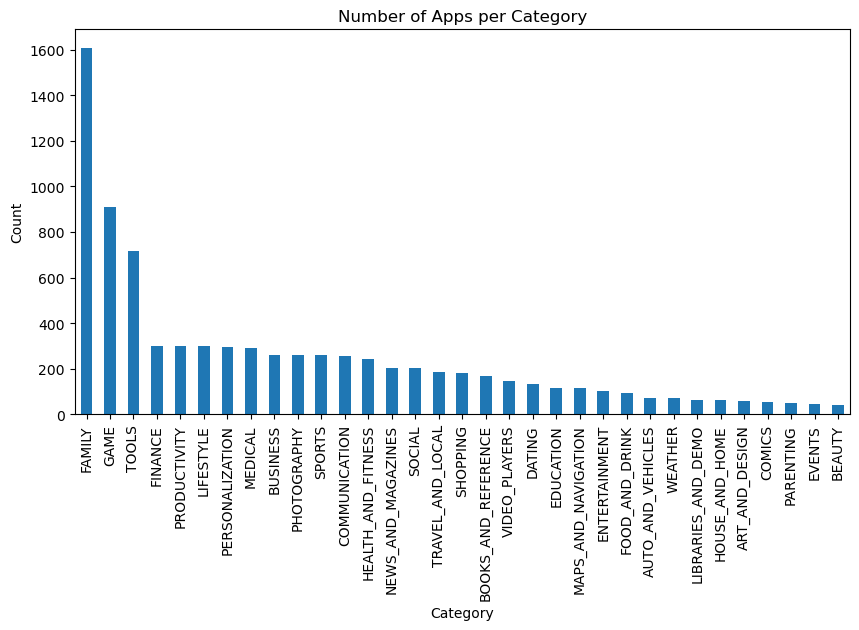

In [8]:
#catagory analysis 
plt.figure(figsize=(10,5))
apps_df['Category'].value_counts().plot(kind='bar')
plt.title("Number of Apps per Category")
plt.ylabel("Count")
plt.show()

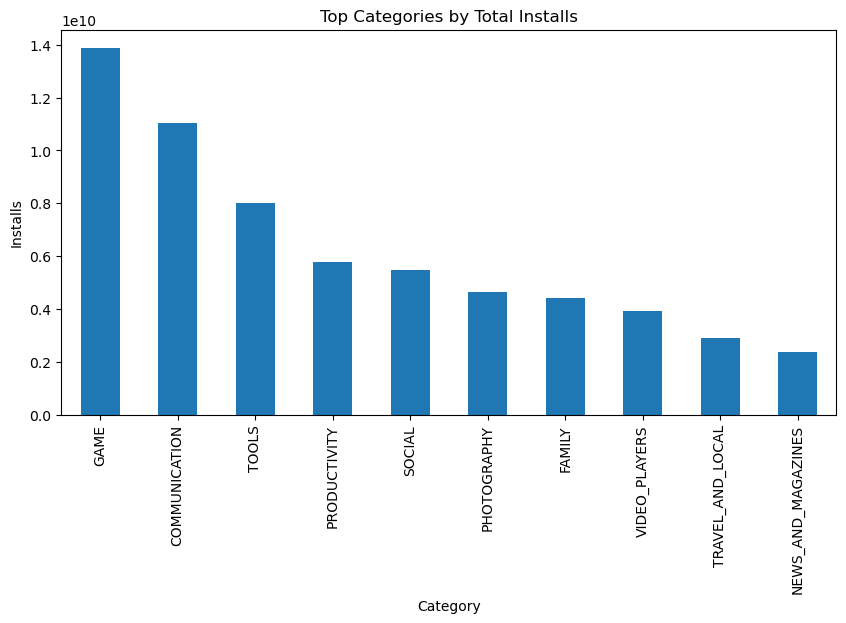

In [9]:
#TOP CATEGORIES BY INSTALLS
category_installs = apps_df.groupby('Category')['Installs'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
category_installs.head(10).plot(kind='bar')
plt.title("Top Categories by Total Installs")
plt.ylabel("Installs")
plt.show()

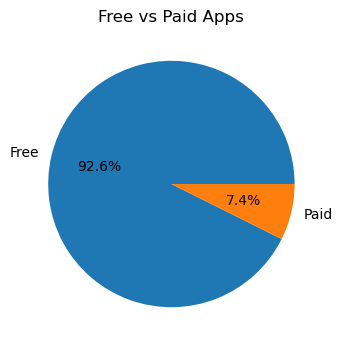

In [10]:
#FREE VS PAID APPS
plt.figure(figsize=(5,4))
apps_df['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Free vs Paid Apps")
plt.ylabel("")
plt.show()


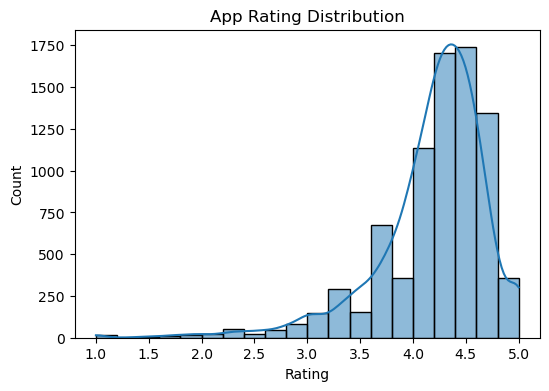

In [11]:
# RATING DISTRIBUTION
plt.figure(figsize=(6,4))
sns.histplot(apps_df['Rating'], bins=20, kde=True)
plt.title("App Rating Distribution")
plt.show()

In [12]:
#USER REVIEWS DATA OVERVIEW
print("\nUser Reviews Dataset Info:")
reviews_df.info()


User Reviews Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


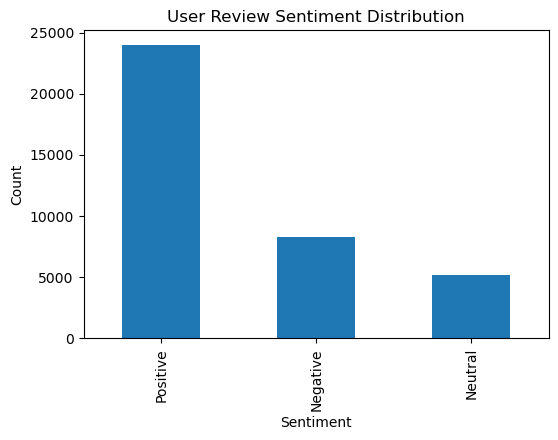

In [13]:
#SENTIMENT ANALYSIS (USER REVIEWS)
sentiment_counts = reviews_df['Sentiment'].value_counts()

plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar')
plt.title("User Review Sentiment Distribution")
plt.ylabel("Count")
plt.show()

In [15]:
sentiment_score = (
    reviews_df
    .groupby('App')['Sentiment_Polarity']
    .mean()
    .reset_index()
)

# Merge sentiment score with apps data
merged_df = apps_df.merge(sentiment_score, on='App', how='left')

# FIXED LINE (NO WARNING)
merged_df['Sentiment_Polarity'] = merged_df['Sentiment_Polarity'].fillna(0)


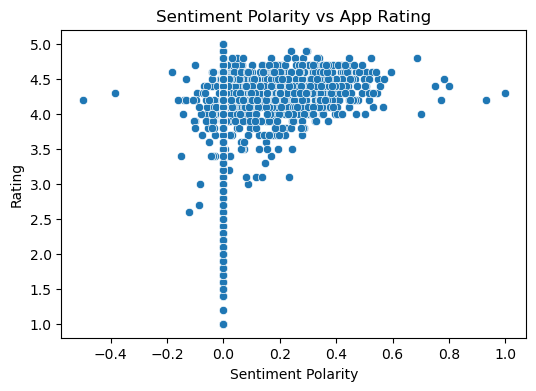

In [16]:
# SENTIMENT vs RATING
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=merged_df['Sentiment_Polarity'],
    y=merged_df['Rating']
)
plt.title("Sentiment Polarity vs App Rating")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Rating")
plt.show()

In [17]:
# MOST POPULAR APPS
top_apps = apps_df.sort_values(by='Installs', ascending=False)[
    ['App', 'Category', 'Installs', 'Rating']
].head(10)

print("\nTop 10 Most Installed Apps:")
print(top_apps)


Top 10 Most Installed Apps:
                               App             Category    Installs  Rating
2191                 Google Photos          PHOTOGRAPHY  1000000000     4.5
2002                      Facebook               SOCIAL  1000000000     4.1
152              Google Play Books  BOOKS_AND_REFERENCE  1000000000     3.9
701              Google Play Games        ENTERTAINMENT  1000000000     4.3
2012                       Google+               SOCIAL  1000000000     4.2
2003                     Instagram               SOCIAL  1000000000     4.5
1356                Subway Surfers                 GAME  1000000000     4.5
2977                   Google News   NEWS_AND_MAGAZINES  1000000000     3.9
304                          Gmail        COMMUNICATION  1000000000     4.3
302   Google Chrome: Fast & Secure        COMMUNICATION  1000000000     4.3


In [18]:
#KEY INSIGHTS
print("""
KEY INSIGHTS:
- Most apps on the Play Store are free
- Games and Communication categories dominate installs
- Higher sentiment polarity generally aligns with better ratings
- Paid apps represent a very small portion of total apps
- User sentiment provides valuable insight into app quality
""")


KEY INSIGHTS:
- Most apps on the Play Store are free
- Games and Communication categories dominate installs
- Higher sentiment polarity generally aligns with better ratings
- Paid apps represent a very small portion of total apps
- User sentiment provides valuable insight into app quality

